In [1]:
import pandas as pd
%pylab inline
import seaborn as sns
from lifelines import KaplanMeierFitter
from ipywidgets import interact, interactive, fixed, interact_manual
plt.style.use('bmh')
plt.rcParams["figure.figsize"] = (14,6)

Populating the interactive namespace from numpy and matplotlib


In [2]:
df=pd.read_csv('Churn_Modelling.csv')
print(df.shape)
df.head(3)


(10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


- **T** = poppulation Tenure
- **C** = Censorship

In [3]:
T=df['Tenure']
C=df['Exited']

In [4]:
kmf=KaplanMeierFitter()
kmf.fit(T,C)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 10000 total observations, 7963 right-censored observations>

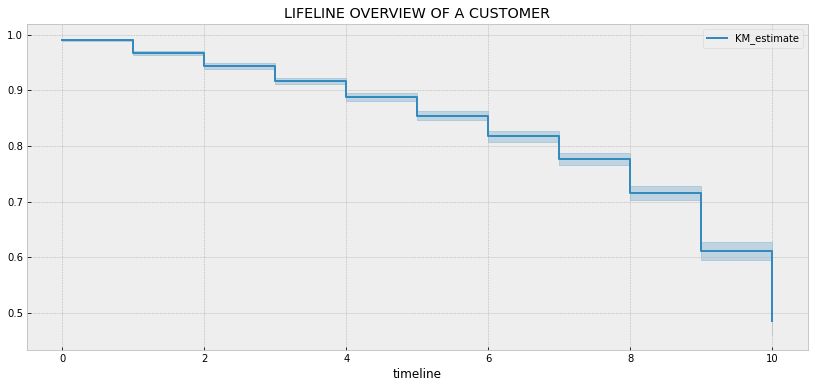

In [5]:
plt.title('LIFELINE OVERVIEW OF A CUSTOMER')
kmf.plot();

Now you have it. On the X-axis the lifetime(in number of years) and the Y-axis the probablity. That is much better 
trying to predict using the Sklearn Machine Learning models.

In [6]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

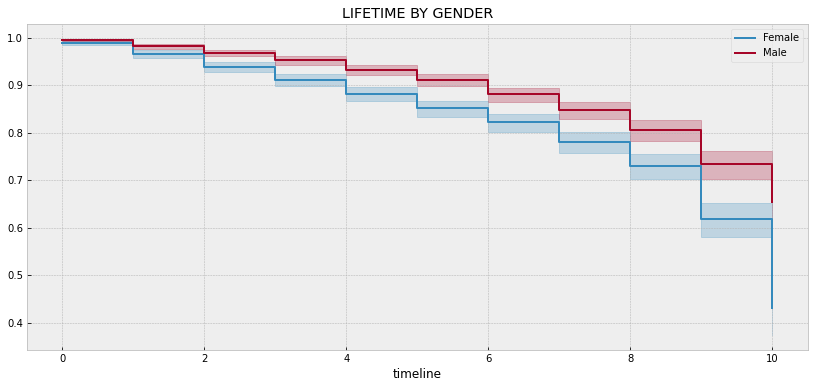

In [7]:
def country_overview(country):
    '''Choose country: France, Germany or Spain'''
    
    global df
    df=df[df['Geography']==country]
    
    kmf.fit(df[df['Gender']=='Female']['Tenure'],df[df['Gender']=='Female']['Exited'], label='Female')
    kmf.plot()

    kmf.fit(df[df['Gender']!='Female']['Tenure'],df[df['Gender']!='Female']['Exited'], label='Male')
    kmf.plot()
    
    plt.title('LIFETIME BY GENDER')
    

country_overview('France')